In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Evaluate model parameters

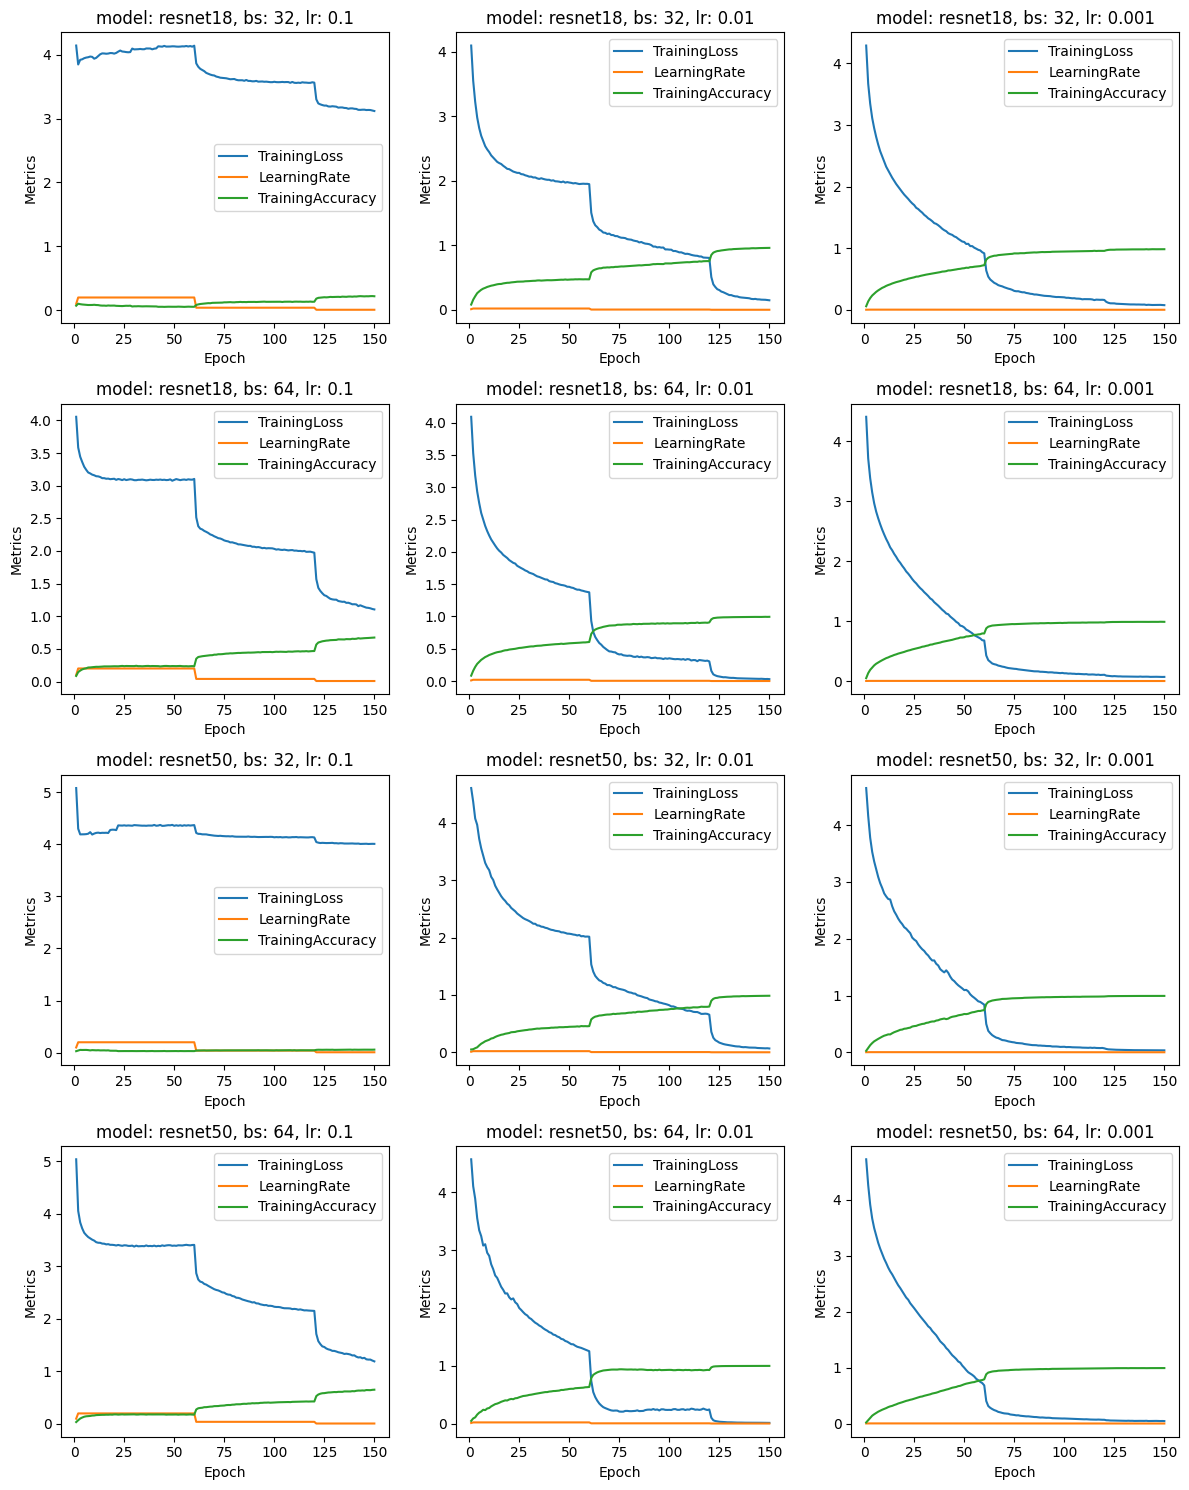

In [ ]:
models = ["resnet18", "resnet50"]
batch_sizes = [32, 64]
learning_rates = [0.1, 0.01, 0.001]
epoch = 150

            

fig, axes = plt.subplots(4, 3, figsize=(12, 15))
axes = axes.flatten()

for i, model in enumerate(models):
    for j, batch_size in enumerate(batch_sizes):
        for k, learning_rate in enumerate(learning_rates):
            df = pd.read_csv(f"result/{model}_{batch_size}_{learning_rate}_{epoch}.csv")
            ax = axes[i * len(batch_sizes) * len(learning_rates) + j * len(learning_rates) + k]
            df.plot(x='Epoch', y='TrainingLoss', ax=ax, label='TrainingLoss')
            df.plot(x='Epoch', y='LearningRate', ax=ax, label='LearningRate')
            df.plot(x='Epoch', y='TrainingAccuracy', ax=ax, label='TrainingAccuracy')
            ax.set_title(f"model: {model}, bs: {batch_size}, lr: {learning_rate}")
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Metrics')

plt.tight_layout()
plt.show()


In [11]:
df = pd.read_csv('result/results.csv')
df_150 = df[df['Epochs'] == 150].copy()
df_150_sort = df_150.sort_values(by='LearningTime')
df_150_sort = df_150_sort.drop(columns=['Epochs', 'Top1Accuracy', 'Top5Accuracy'])
print(df_150_sort)

       Model  BatchSize  LearningRate            LearningTime
21  resnet18         64         0.010  0 days 00:07:03.336285
24  resnet18         64         0.100  0 days 00:07:03.456777
18  resnet18         64         0.001  0 days 00:07:03.767405
33  resnet18         32         0.100  0 days 00:12:38.282953
27  resnet18         32         0.001  0 days 00:12:42.349968
30  resnet18         32         0.010  0 days 00:12:44.112193
6   resnet50         64         0.100  0 days 00:17:17.523201
0   resnet50         64         0.001  0 days 00:17:19.381106
3   resnet50         64         0.010  0 days 00:17:20.335647
12  resnet50         32         0.010  0 days 00:27:53.530000
9   resnet50         32         0.001  0 days 00:27:57.164141
15  resnet50         32         0.100  0 days 00:27:59.797935


In [10]:
df = pd.read_csv('result/results.csv')
df_150 = df[df['Epochs'] == 150].copy()
df_150_sort = df_150.sort_values(by='Top1Accuracy', ascending=False)
df_150_sort = df_150_sort.drop(columns=['Epochs', 'LearningTime', 'Top5Accuracy'])
print(df_150_sort)

       Model  BatchSize  LearningRate  Top1Accuracy
12  resnet50         32         0.010        0.6074
30  resnet18         32         0.010        0.5931
3   resnet50         64         0.010        0.5782
21  resnet18         64         0.010        0.5715
9   resnet50         32         0.001        0.5508
27  resnet18         32         0.001        0.5495
24  resnet18         64         0.100        0.5406
6   resnet50         64         0.100        0.5377
18  resnet18         64         0.001        0.5144
0   resnet50         64         0.001        0.4860
33  resnet18         32         0.100        0.2500
15  resnet50         32         0.100        0.0697


In [8]:
df = pd.read_csv('result/results.csv')
df_150 = df[df['Epochs'] == 150].copy()
df_150_sort = df_150.sort_values(by='Top5Accuracy', ascending=False)
df_150_sort = df_150_sort.drop(columns=['Epochs', 'LearningTime', 'Top1Accuracy'])
print(df_150_sort)

       Model  BatchSize  LearningRate  Top5Accuracy
12  resnet50         32         0.010        0.8449
30  resnet18         32         0.010        0.8306
24  resnet18         64         0.100        0.8176
3   resnet50         64         0.010        0.8171
6   resnet50         64         0.100        0.8150
21  resnet18         64         0.010        0.8126
27  resnet18         32         0.001        0.7960
9   resnet50         32         0.001        0.7917
18  resnet18         64         0.001        0.7710
0   resnet50         64         0.001        0.7457
33  resnet18         32         0.100        0.5724
15  resnet50         32         0.100        0.2512


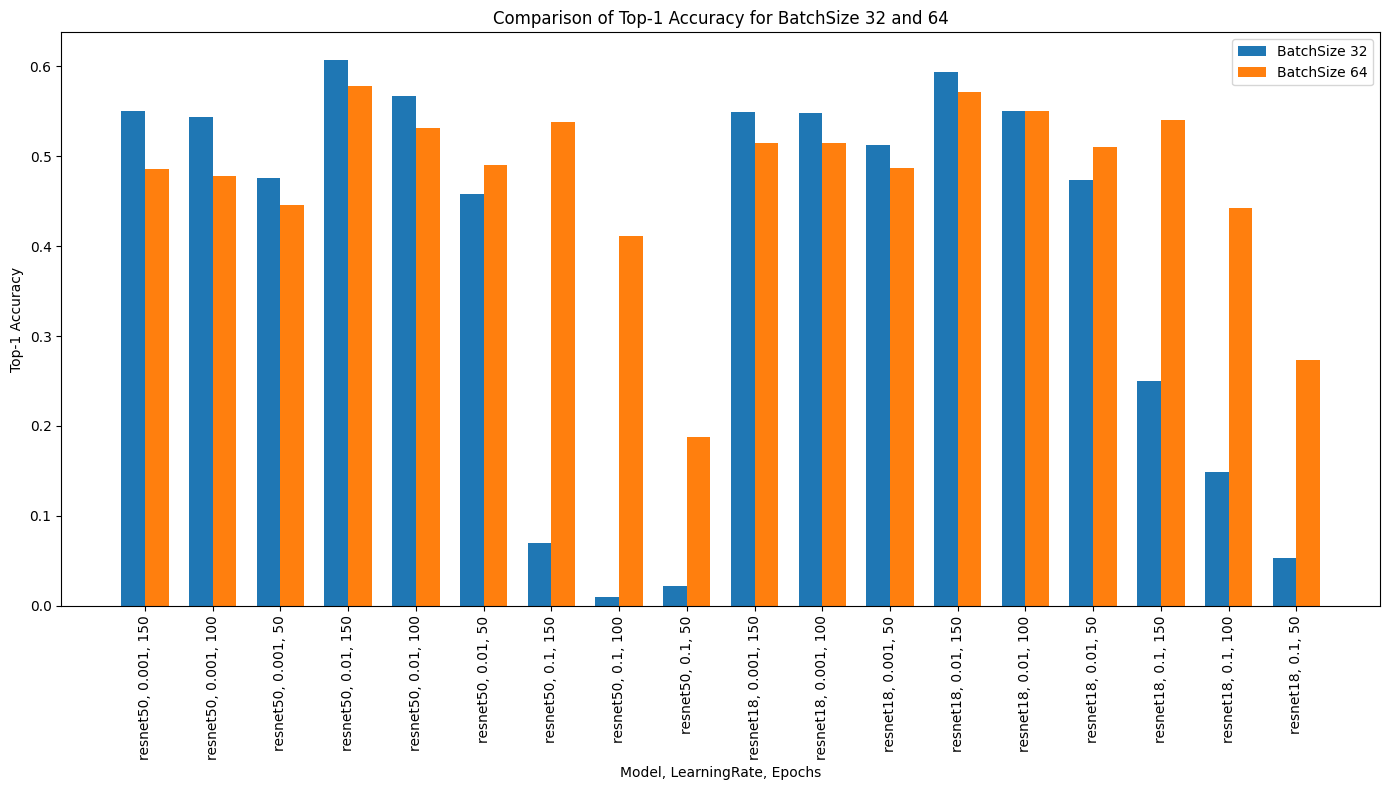

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('result/results.csv')

df_32 = df[df['BatchSize'] == 32]
df_64 = df[df['BatchSize'] == 64]

merged_df = pd.merge(df_32, df_64, on=['Model', 'LearningRate', 'Epochs'], suffixes=('_32', '_64'))

plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(merged_df))

plt.bar(index, merged_df['Top1Accuracy_32'], bar_width, label='BatchSize 32')
plt.bar([i + bar_width for i in index], merged_df['Top1Accuracy_64'], bar_width, label='BatchSize 64')

plt.xlabel('Model, LearningRate, Epochs')
plt.ylabel('Top-1 Accuracy')
plt.title('Comparison of Top-1 Accuracy for BatchSize 32 and 64')
plt.xticks([i + bar_width / 2 for i in index], merged_df.apply(lambda row: f"{row['Model']}, {row['LearningRate']}, {row['Epochs']}", axis=1), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

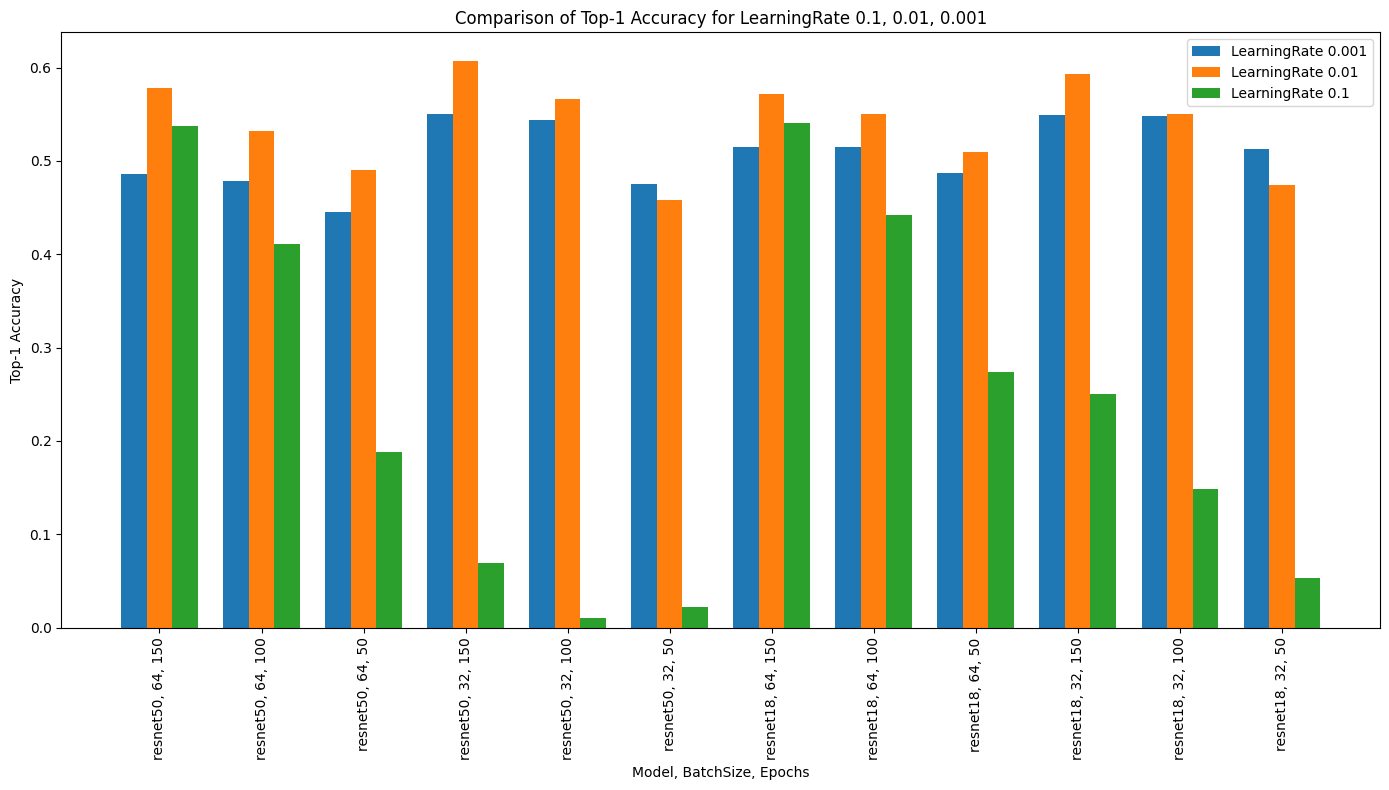

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('result/results.csv')

df_001 = df[df['LearningRate'] == 0.001]
df_01 = df[df['LearningRate'] == 0.01]
df_1 = df[df['LearningRate'] == 0.1]

merged_df = pd.merge(df_001, df_01, on=['Model', 'BatchSize', 'Epochs'], suffixes=('_001', '_01'))
merged_df = pd.merge(merged_df, df_1, on=['Model', 'BatchSize', 'Epochs'])
merged_df = merged_df.rename(columns={'Top1Accuracy': 'Top1Accuracy_1'})

plt.figure(figsize=(14, 8))
bar_width = 0.25
index = range(len(merged_df))

plt.bar(index, merged_df['Top1Accuracy_001'], bar_width, label='LearningRate 0.001')
plt.bar([i + bar_width for i in index], merged_df['Top1Accuracy_01'], bar_width, label='LearningRate 0.01')
plt.bar([i + 2 * bar_width for i in index], merged_df['Top1Accuracy_1'], bar_width, label='LearningRate 0.1')

plt.xlabel('Model, BatchSize, Epochs')
plt.ylabel('Top-1 Accuracy')
plt.title('Comparison of Top-1 Accuracy for LearningRate 0.1, 0.01, 0.001')
plt.xticks([i + bar_width for i in index], merged_df.apply(lambda row: f"{row['Model']}, {row['BatchSize']}, {row['Epochs']}", axis=1), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

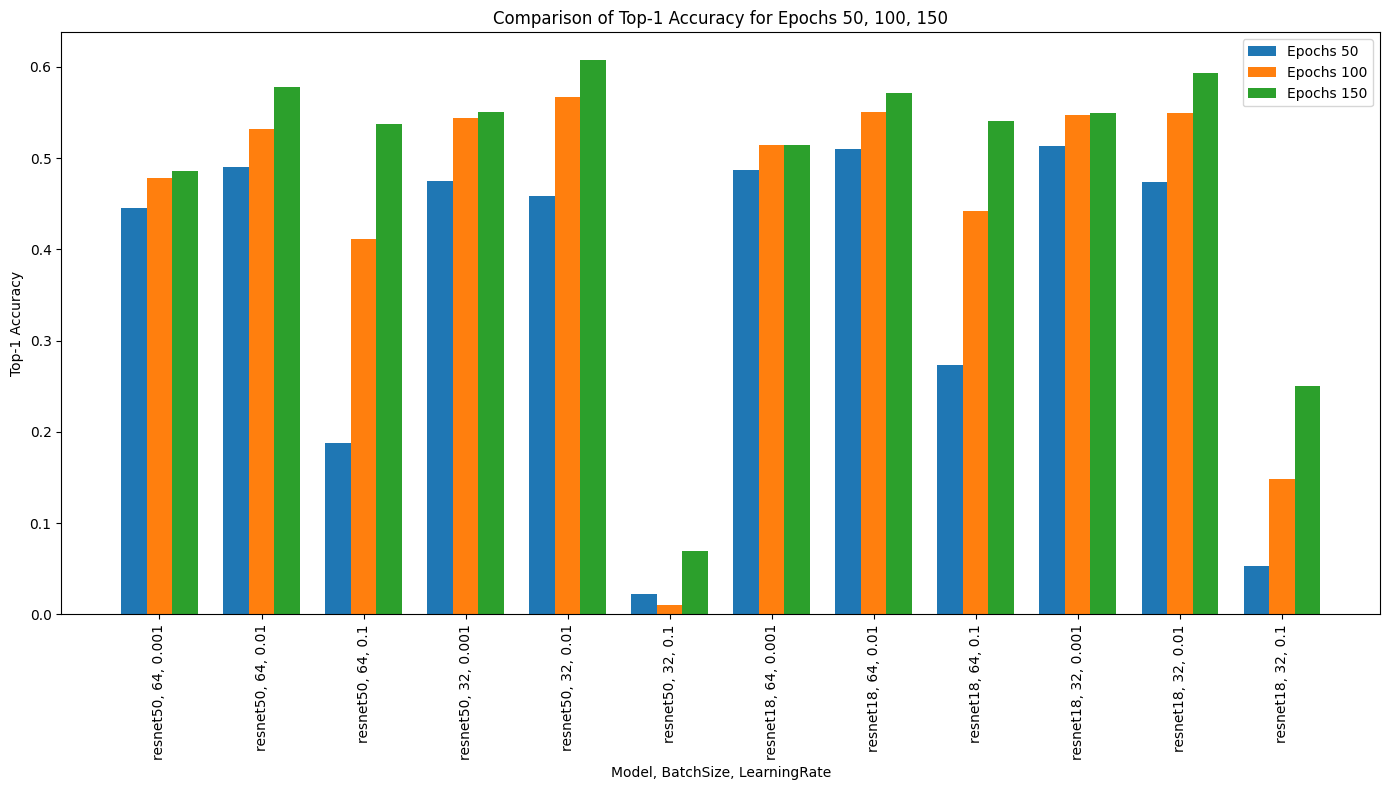

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('result/results.csv')

df_50 = df[df['Epochs'] == 50]
df_100 = df[df['Epochs'] == 100]
df_150 = df[df['Epochs'] == 150]


merged_df = pd.merge(df_50, df_100, on=['Model', 'BatchSize', 'LearningRate'], suffixes=('_50', '_100'))
merged_df = pd.merge(merged_df, df_150, on=['Model', 'BatchSize', 'LearningRate'])
merged_df = merged_df.rename(columns={'Top1Accuracy': 'Top1Accuracy_150'})

plt.figure(figsize=(14, 8))
bar_width = 0.25
index = range(len(merged_df))

plt.bar(index, merged_df['Top1Accuracy_50'], bar_width, label='Epochs 50')
plt.bar([i + bar_width for i in index], merged_df['Top1Accuracy_100'], bar_width, label='Epochs 100')
plt.bar([i + 2 * bar_width for i in index], merged_df['Top1Accuracy_150'], bar_width, label='Epochs 150')

plt.xlabel('Model, BatchSize, LearningRate')
plt.ylabel('Top-1 Accuracy')
plt.title('Comparison of Top-1 Accuracy for Epochs 50, 100, 150')
plt.xticks([i + bar_width for i in index], merged_df.apply(lambda row: f"{row['Model']}, {row['BatchSize']}, {row['LearningRate']}", axis=1), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()